# Cole's Metric

Speed bumps

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

In [5]:
speed_humps_data = pd.read_csv("speed_humps.csv")
speed_humps_data.head(10)

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355
5,25169591,10,4224.0,Saline St,4673,Asphalt,Squirrel Hill South,5,15,42003141400,3,15,4,2-15,40.422239,-79.926208
6,2056880845,11,2146.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.391643,-79.999307
7,1735565853,12,2082.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.392425,-79.999259
8,857069875,13,2013.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.393264,-79.999401
9,1822275525,14,1937.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.394180,-79.999611


In [19]:
humps_per_hood = speed_humps_data["neighborhood"].value_counts()
hmax = humps_data["humps"].max()
humps_per_hood.head(10)

Squirrel Hill South    18
Carrick                 9
North Oakland           6
Polish Hill             6
South Side Slopes       4
Homewood South          4
Brookline               4
Upper Hill              4
Perry North             4
Mount Washington        3
Name: neighborhood, dtype: int64

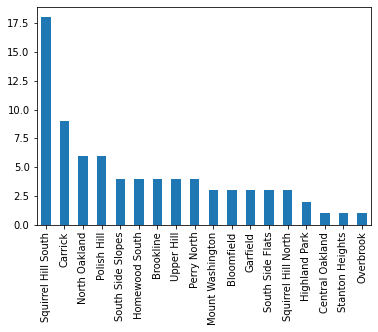

In [9]:
humps_per_hood.plot.bar()

In [23]:
humps_data = pd.DataFrame({"neighborhood" : humps_per_hood.axes[0], "humps" : humps_per_hood.values})
humps_data.head(10)

,neighborhood,humps
0,Squirrel Hill South,18
1,Carrick,9
2,North Oakland,6
3,Polish Hill,6
4,South Side Slopes,4
5,Homewood South,4
6,Brookline,4
7,Upper Hill,4
8,Perry North,4
9,Mount Washington,3


In [24]:
humps_data_normal = pd.DataFrame({"neighborhood" : humps_per_hood.axes[0], "humps" : humps_per_hood.values/hmax})
humps_data_normal.head(10)

,neighborhood,humps
0,Squirrel Hill South,1.000000
1,Carrick,0.500000
2,North Oakland,0.333333
3,Polish Hill,0.333333
4,South Side Slopes,0.222222
5,Homewood South,0.222222
6,Brookline,0.222222
7,Upper Hill,0.222222
8,Perry North,0.222222
9,Mount Washington,0.166667


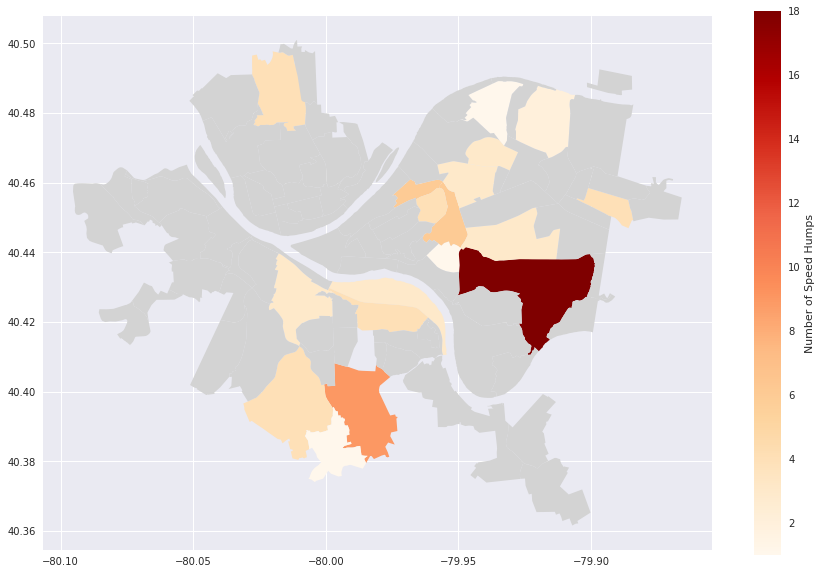

In [36]:
hoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
humps_map = hoods.merge(humps_data, how="left", left_on="hood", right_on="neighborhood")
humps_map.plot(column="humps", legend=True, legend_kwds={"label": "Number of Speed Humps"}, figsize=(15,10), missing_kwds={"color": "lightgrey"}, cmap="OrRd")
plt.style.use('seaborn')